In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

# Goal: explore baseline (non-IPTsc) sims to understand why IPTsc impact is different in different places
- Also can update figure which shows clinical seasonality vs school calendar

Steps:
1. Get time series data of the scenario 30 (no IPTsc) for each archetype and EIR level.  Interested in cases, 

In [2]:
df1 = pd.read_csv("sim_data_5d3e97d2-2bc0-ec11-a9f6-9440c9be2c51.csv")
df2 = pd.read_csv("sim_data_7dfbe25b-29c0-ec11-a9f6-9440c9be2c51.csv")

In [3]:
df = pd.concat([df1,df2])
df

,rdt_prev,new_cases,days,archetype,baseline_eir,Run_Number,scenario_number
0,0.179281,14,0,Central,1,0,13
1,0.179410,12,1,Central,1,0,13
2,0.181052,9,2,Central,1,0,13
3,0.183096,12,3,Central,1,0,13
4,0.184702,12,4,Central,1,0,13
...,...,...,...,...,...,...,...
58395,0.392033,10,725,Sahel,30,3,30
58396,0.389785,18,726,Sahel,30,3,30
58397,0.384883,18,727,Sahel,30,3,30
58398,0.385621,20,728,Sahel,30,3,30


In [4]:
set(df["scenario_number"])

{13, 19, 22, 30}

In [ ]:
def plot_campaign_times(archetype, scenario_number):
    if archetype == "

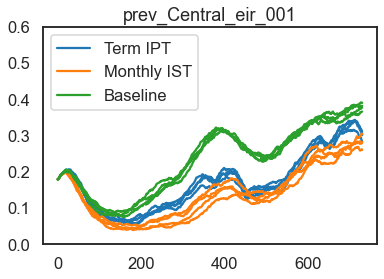

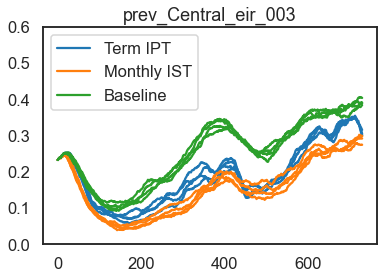

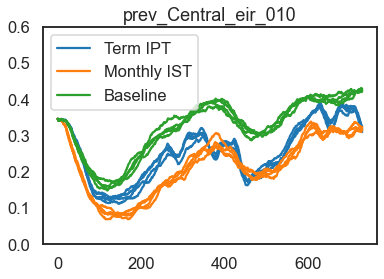

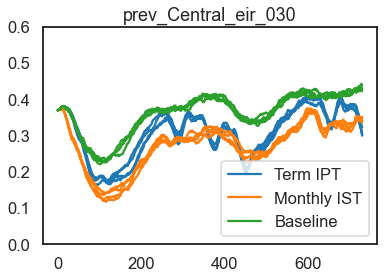

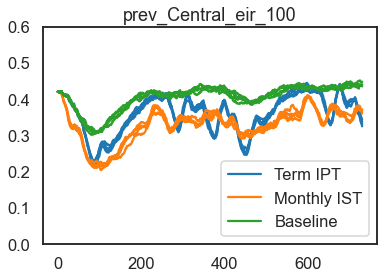

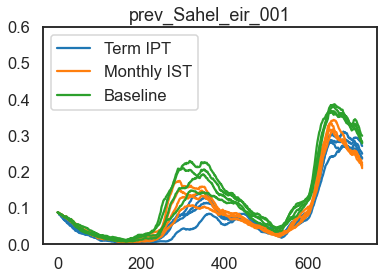

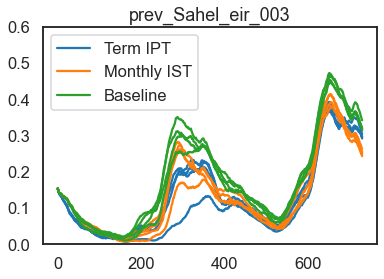

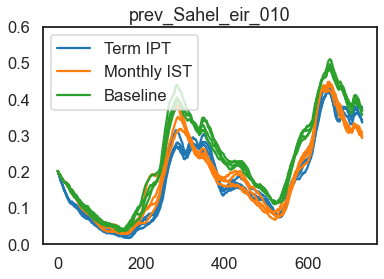

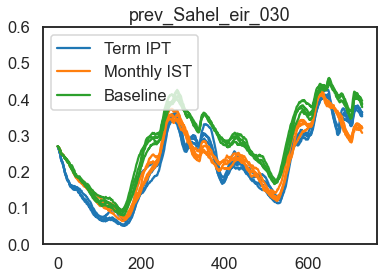

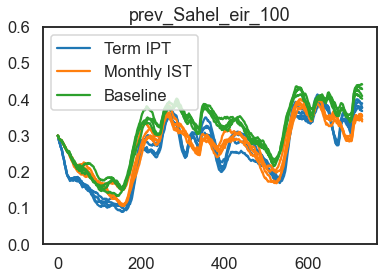

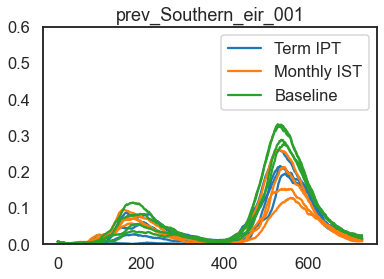

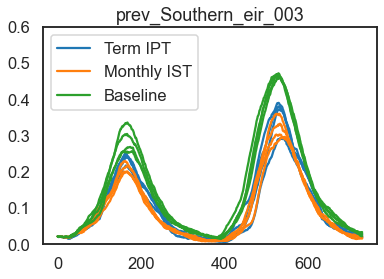

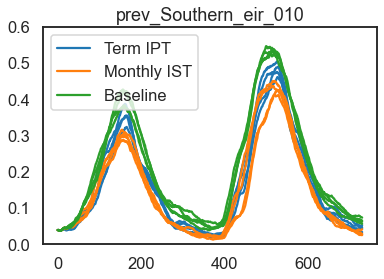

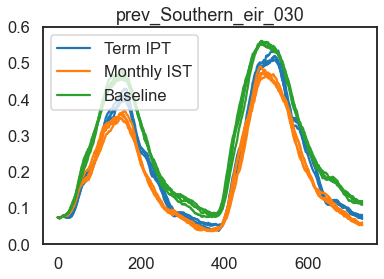

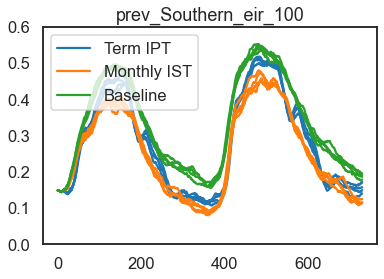

In [7]:
color_dict = {13: "C0",
              22: "C1",
              30: "C2"}
label_dict = {30: "Baseline",
              13: "Term IPT",
              22: "Monthly IST"}
              
for i, sdf in df.groupby(["archetype","baseline_eir"]):
    # if i[0] == "Southern" and i[1] == 30:
        plt.figure()
        for ii, ssdf in sdf.groupby(["scenario_number", "Run_Number"]):
            if ii[0] != 19:
                if ii[1] == 1:
                    label=label_dict[ii[0]]
                else:
                    label = None
                plt.plot(ssdf["days"], ssdf["rdt_prev"], color=color_dict[ii[0]], label=label)
        plt.ylim([0,0.6])
        plt.legend()
        title = f"prev_{i[0]}_eir_{str(i[1]).zfill(3)}"
        plt.title(title)
        plt.savefig(f"{title}.png")

In [18]:
df.drop(columns=["binned"], inplace=True)

In [19]:
labels = np.arange(12*2)
bins = np.linspace(-1,2*365-1,12*2+1)
df['month'] = pd.cut(df['days'], bins=bins, labels=labels)
df

,rdt_prev,new_cases,days,archetype,baseline_eir,Run_Number,scenario_number,month
0,0.179281,14,0,Central,1,0,13,0
1,0.179410,12,1,Central,1,0,13,0
2,0.181052,9,2,Central,1,0,13,0
3,0.183096,12,3,Central,1,0,13,0
4,0.184702,12,4,Central,1,0,13,0
...,...,...,...,...,...,...,...,...
58395,0.392033,10,725,Sahel,30,3,30,23
58396,0.389785,18,726,Sahel,30,3,30,23
58397,0.384883,18,727,Sahel,30,3,30,23
58398,0.385621,20,728,Sahel,30,3,30,23


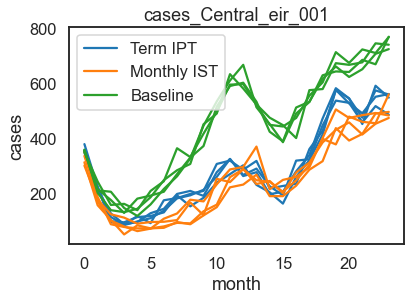

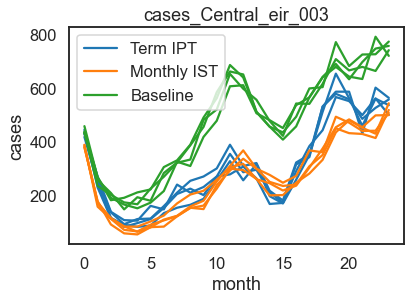

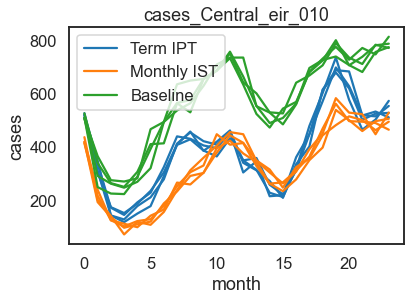

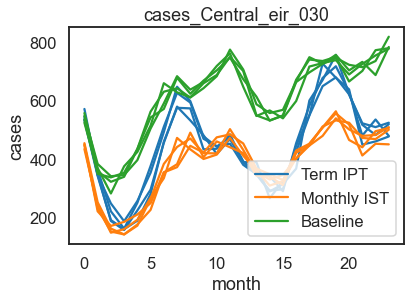

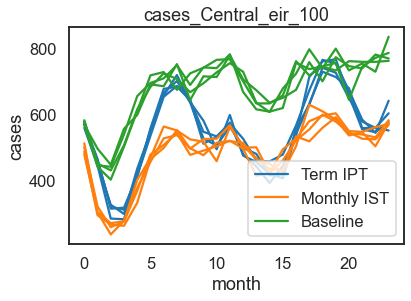

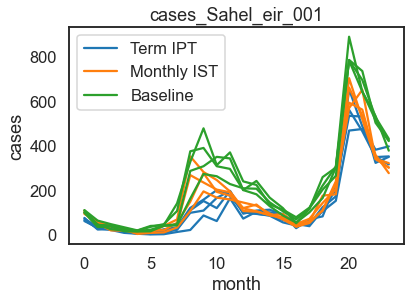

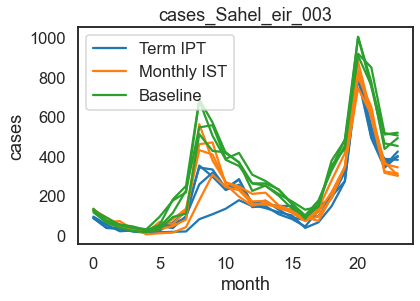

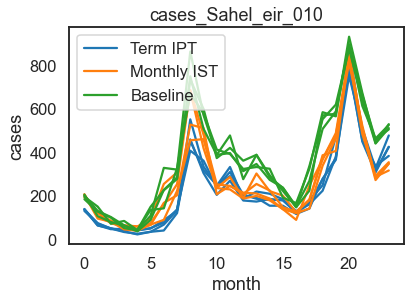

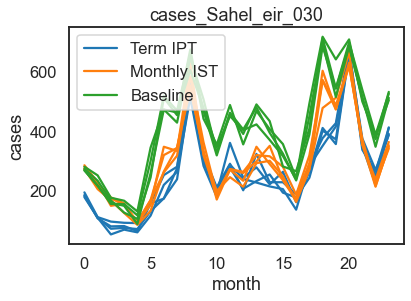

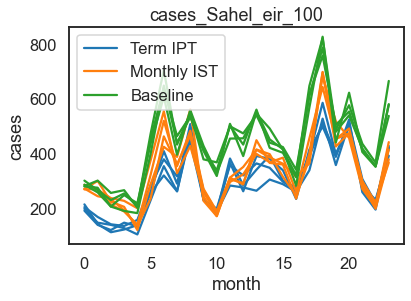

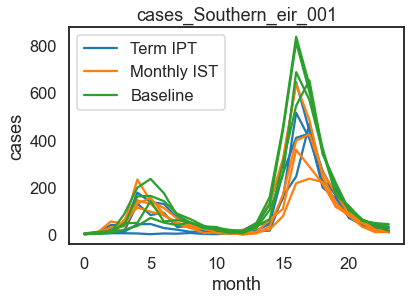

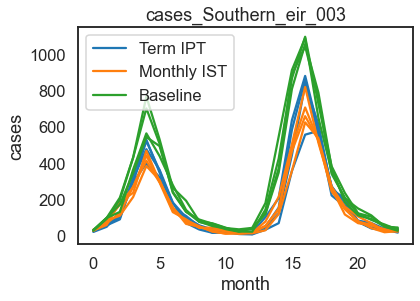

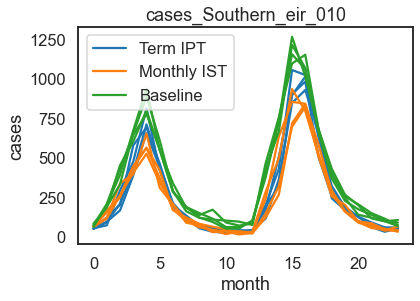

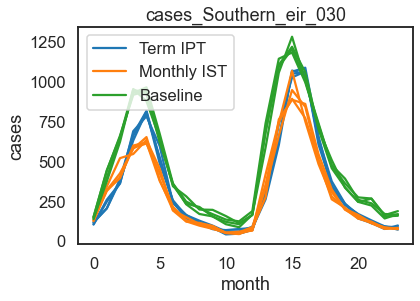

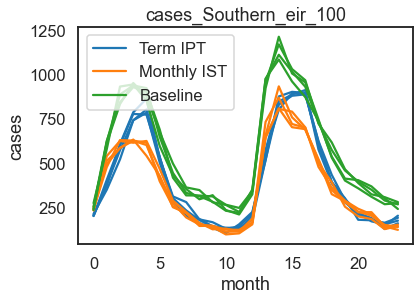

In [26]:
color_dict = {13: "C0",
              22: "C1",
              30: "C2"}
label_dict = {30: "Baseline",
              13: "Term IPT",
              22: "Monthly IST"}
              
for i, sdf in df.groupby(["archetype","baseline_eir"]):
    # if i[0] == "Southern" and i[1] == 30:
        plt.figure()
        for ii, ssdf in sdf.groupby(["scenario_number", "Run_Number"]):
            if ii[0] != 19:
                if ii[1] == 1:
                    label=label_dict[ii[0]]
                else:
                    label = None

                by_month = ssdf.groupby(["month"]).agg("sum").reset_index()
                # plt.plot(ssdf["days"], ssdf["new_cases"], color=color_dict[ii[0]], label=label)
                plt.plot(by_month["month"], by_month["new_cases"], color=color_dict[ii[0]], label=label)
        # plt.ylim([0,50])
        plt.legend()
        title = f"cases_{i[0]}_eir_{str(i[1]).zfill(3)}"
        plt.title(title)
        plt.xlabel("month")
        plt.ylabel("cases")
        plt.savefig(f"{title}.png")

In [46]:
# Very crude overview:
foo = df.groupby(["archetype","baseline_eir", "scenario_number"]).agg("sum").reset_index()
foo

,archetype,baseline_eir,scenario_number,rdt_prev,new_cases,days,Run_Number
0,Central,1,13,493.169835,28140,1064340,4380
1,Central,1,19,561.566347,34348,1064340,4380
2,Central,1,30,675.316060,42965,1064340,4380
3,Central,3,13,547.717953,29613,1064340,4380
4,Central,3,19,629.143910,36478,1064340,4380
5,Central,3,30,738.420300,45348,1064340,4380
6,Central,10,13,743.584412,37356,1064340,4380
7,Central,10,19,814.989720,43974,1064340,4380
8,Central,10,30,937.834818,54948,1064340,4380
9,Central,30,13,896.940779,43014,1064340,4380


Text(0, 0.5, '2-year RDT prev average')

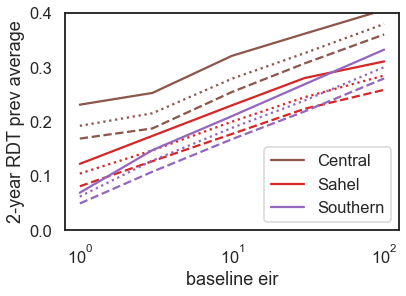

In [66]:
ls_dict = {30: 'solid',
           13: 'dashed',
           19: 'dotted'}

color_dict = {"Sahel": "C3",
              "Southern": "C4",
              "Central": "C5"}


for a,sdf in foo.groupby(["archetype", "scenario_number"]):
    ls = ls_dict[a[1]]
    if a[1] == 30:
        label = a[0]
    else:
        label = None
    plt.plot(sdf["baseline_eir"], sdf["rdt_prev"]/(365*2*4), c=color_dict[a[0]], ls=ls, label=label)
plt.legend()
plt.xscale("log")
plt.ylim([0,0.4])
plt.xlabel("baseline eir")
plt.ylabel("2-year RDT prev average")

Text(0, 0.5, '2-year case prev average')

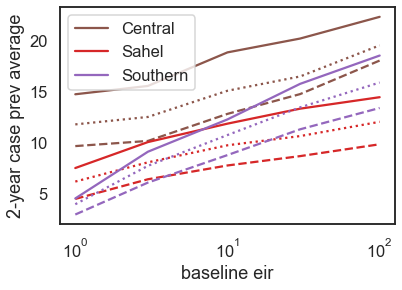

In [74]:
ls_dict = {30: 'solid',
           13: 'dashed',
           19: 'dotted'}

color_dict = {"Sahel": "C3",
              "Southern": "C4",
              "Central": "C5"}


for a,sdf in foo.groupby(["archetype", "scenario_number"]):
    ls = ls_dict[a[1]]
    if a[1] == 30:
        label = a[0]
    else:
        label = None
    plt.plot(sdf["baseline_eir"], sdf["new_cases"]/(365*2*4), c=color_dict[a[0]], ls=ls, label=label)
plt.legend()
plt.xscale("log")
# plt.ylim([0,0.4])
plt.xlabel("baseline eir")
plt.ylabel("2-year case prev average")

In [71]:
# Now limiting to final year:
foo2 = df[df["days"]>365].groupby(["archetype","baseline_eir", "scenario_number"]).agg("sum").reset_index()
foo2

,archetype,baseline_eir,scenario_number,rdt_prev,new_cases,days,Run_Number
0,Central,1,13,321.186264,18793,797160,2184
1,Central,1,19,372.577444,23037,797160,2184
2,Central,1,30,446.997955,28389,797160,2184
3,Central,3,13,347.282661,19420,797160,2184
4,Central,3,19,392.917681,22817,797160,2184
5,Central,3,30,469.407923,29027,797160,2184
6,Central,10,13,420.148287,21535,797160,2184
7,Central,10,19,461.888424,25169,797160,2184
8,Central,10,30,539.300665,31949,797160,2184
9,Central,30,13,480.298066,23438,797160,2184


Text(0, 0.5, 'final-year RDT prev average')

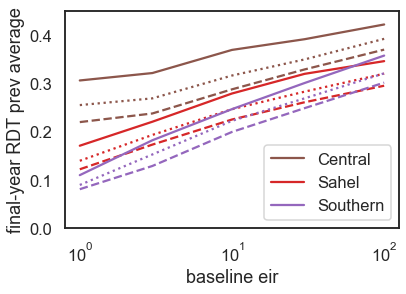

In [76]:
ls_dict = {30: 'solid',
           13: 'dashed',
           19: 'dotted'}

color_dict = {"Sahel": "C3",
              "Southern": "C4",
              "Central": "C5"}


for a,sdf in foo2.groupby(["archetype", "scenario_number"]):
    ls = ls_dict[a[1]]
    if a[1] == 30:
        label = a[0]
    else:
        label = None
    plt.plot(sdf["baseline_eir"], sdf["rdt_prev"]/(365*4), c=color_dict[a[0]], ls=ls, label=label)
plt.legend()
plt.xscale("log")
plt.ylim([0,0.45])
plt.xlabel("baseline eir")
plt.ylabel("final-year RDT prev average")

Text(0, 0.5, 'final-year case average')

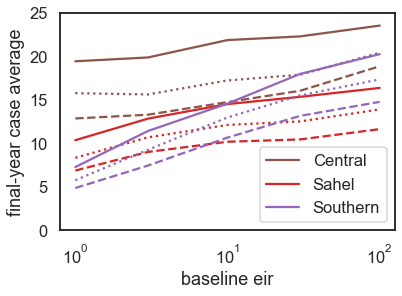

In [78]:
ls_dict = {30: 'solid',
           13: 'dashed',
           19: 'dotted'}

color_dict = {"Sahel": "C3",
              "Southern": "C4",
              "Central": "C5"}


for a,sdf in foo2.groupby(["archetype", "scenario_number"]):
    ls = ls_dict[a[1]]
    if a[1] == 30:
        label = a[0]
    else:
        label = None
    plt.plot(sdf["baseline_eir"], sdf["new_cases"]/(365*4), c=color_dict[a[0]], ls=ls, label=label)
plt.legend()
plt.xscale("log")
plt.ylim([0,25])
plt.xlabel("baseline eir")
plt.ylabel("final-year case average")

In [83]:
# recompute effect sizes
base = foo2[foo2["scenario_number"]==30].groupby(["archetype", "baseline_eir"]).agg("sum").reset_index()
ipt = foo2[foo2["scenario_number"]==13].groupby(["archetype", "baseline_eir"]).agg("sum").reset_index()
ist = foo2[foo2["scenario_number"]==19].groupby(["archetype", "baseline_eir"]).agg("sum").reset_index()

In [105]:
ipt["diff_cases"] = (base["new_cases"]-ipt["new_cases"])/base["new_cases"]
ipt["diff_prev"] = (base["rdt_prev"]-ipt["rdt_prev"])/base["rdt_prev"]
ist["diff_cases"] = (base["new_cases"]-ist["new_cases"])/base["new_cases"]
ist["diff_prev"] = (base["rdt_prev"]-ist["rdt_prev"])/base["rdt_prev"]


(0.0, 0.4)

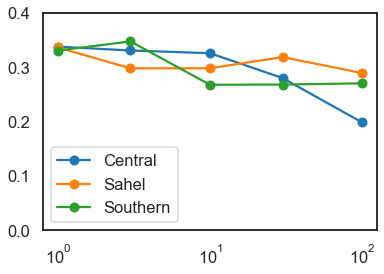

In [108]:
for i,sdf in ipt.groupby(["archetype"]):
    plt.plot(sdf["baseline_eir"], sdf["diff_cases"], label=i, marker='o')
plt.legend()
plt.xscale("log")
plt.ylim([0,0.4])

(0.0, 0.4)

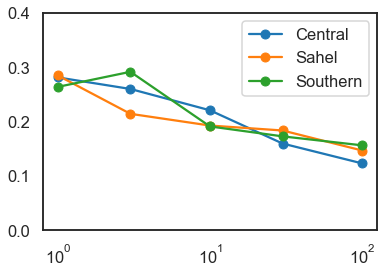

In [109]:
for i,sdf in ipt.groupby(["archetype"]):
    plt.plot(sdf["baseline_eir"], sdf["diff_prev"], label=i, marker='o')
plt.legend()
plt.xscale("log")
plt.ylim([0,0.4])

(0.0, 0.4)

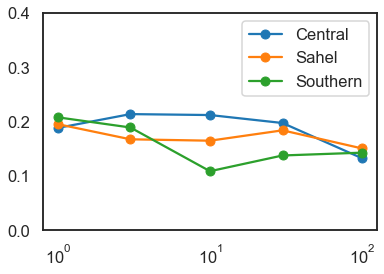

In [110]:
for i,sdf in ist.groupby(["archetype"]):
    plt.plot(sdf["baseline_eir"], sdf["diff_cases"], label=i, marker='o')
plt.legend()
plt.xscale("log")
plt.ylim([0,0.4])

(0.0, 0.4)

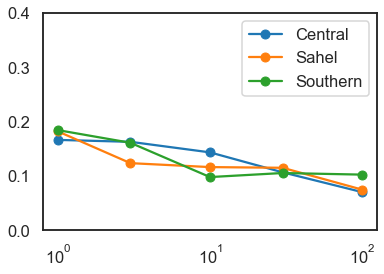

In [111]:
for i,sdf in ist.groupby(["archetype"]):
    plt.plot(sdf["baseline_eir"], sdf["diff_prev"], label=i, marker='o')
plt.legend()
plt.xscale("log")
plt.ylim([0,0.4])

In [112]:
# Are there different amounts of drugs being given out?